# Metricas


## Preguntas

- ¿Cuál es el propósito de la **evaluación de modelos** y cuáles son algunos procedimientos de evaluación comunes?
- ¿Cuál es el uso de la **precisión de clasificación** y cuáles son sus limitaciones?
- ¿Cómo describe una **matriz de confusión** el rendimiento de un clasificador?
- ¿Qué **métricas** se pueden calcular a partir de una matriz de confusión?
- ¿Cómo puede ajustar el rendimiento del clasificador **cambiando el umbral de clasificación**?
- ¿Cuál es el propósito de una **curva ROC**?



# Revisión de la evaluación del modelo

- Necesita una forma de elegir entre modelos: diferentes tipos de modelos, parámetros de ajuste y características
- Use un **procedimiento de evaluación de modelos** para estimar qué tan bien se generalizará un modelo a datos fuera de la muestra
- Requiere una **métrica de evaluación del modelo** para cuantificar el rendimiento del modelo

### Procedimientos de evaluación del modelo

1. **Entrenamiento y pruebas con los mismos datos**
    - Modelos demasiado complejos que "sobreajustan" los datos de entrenamiento y no necesariamente generalizarán
2. **División de entrenamiento/prueba**
    - Se divide el conjunto de datos en dos partes, de modo que el modelo se pueda entrenar y probar en diferentes datos
    - Mejor estimación del rendimiento fuera de la muestra, pero sigue siendo una estimación de "varianza alta"
    - Útil por su rapidez, sencillez y flexibilidad
3. **Validación cruzada de K-fold**
    - Crear sistemáticamente divisiones de prueba/entrenamiento "K" y promediar los resultados juntos
    - Estimación aún mejor del rendimiento fuera de la muestra
    - Corre "K" veces más lento que la división de tren/prueba

### Métricas de evaluación del modelo

- **Problemas de regresión:** Error absoluto medio, error cuadrático medio, error cuadrático medio
- **Problemas de clasificación:** Precisión de clasificación

## Dataset de diabetes

[Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository

In [2]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\UserFiles\anaconda\envs\ia\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



**Pregunta:** ¿Podemos predecir el estado de diabetes de un paciente a partir de sus mediciones de salud?

In [4]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)


In [10]:
print(y_pred_class[:5])
print(y_test[:5])

[0 0 0 0 0]
661    1
122    0
113    0
14     1
529    0
Name: label, dtype: int64


**Precisión de clasificación:** porcentaje de predicciones correctas

In [12]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


**Precisión nula:** precisión que podría lograrse prediciendo siempre la clase más frecuente



In [13]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [14]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [15]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [19]:
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [20]:
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: label, dtype: float64

Comparación de los valores de respuesta **verdadero** y **predicho**

In [21]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Conclusión:**

- La precisión de la clasificación es la **métrica de clasificación más fácil de entender**
- Pero no te dice la **distribución subyacente** de los valores de respuesta
- Y no te dice qué **"tipos" de errores** está cometiendo tu clasificador


## Matriz de confusión

Tabla que describe el rendimiento de un modelo de clasificación

In [23]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


- Cada observación en el conjunto de prueba se representa en **exactamente un cuadro**
- Es una matriz de 2x2 porque hay **2 clases **
- El formato que se muestra aquí **no** es universal

**Terminología básica**

- **Verdaderos positivos (TP):** predijo *correctamente* que *sí* tienen diabetes
- **Negativos verdaderos (TN):** predijo*correctamente* que *no* tienen diabetes
- **Falsos positivos (FP):** predijo *incorrectamente* que *sí* tienen diabetes (un "error de tipo I")
- **Falsos negativos (FN):** predijo *incorrectamente* que *no* tienen diabetes (un "error de tipo II")

In [24]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [18]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


**Error de clasificación:** En general, ¿con qué frecuencia el clasificador es incorrecto?

- También conocida como "tasa de clasificación errónea"

In [19]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


**Sensibilidad:** cuando el valor real es positivo, ¿con qué frecuencia es correcta la predicción?

- ¿Qué tan "sensible" es el clasificador para detectar instancias positivas?
- También conocido como "Tasa de verdaderos positivos" o "Recuperación"

In [20]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


**Especificidad:** Cuando el valor real es negativo, ¿con qué frecuencia es correcta la predicción?

- ¿Qué tan "específico" (o "selectivo") es el clasificador al predecir instancias positivas?

In [21]:
print(TN / float(TN + FP))

0.9076923076923077


**Tasa de falsos positivos:** cuando el valor real es negativo, ¿con qué frecuencia la predicción es incorrecta?

In [22]:
print(FP / float(TN + FP))

0.09230769230769231


**Precisión:** cuando se predice un valor positivo, ¿con qué frecuencia es correcta la predicción?

- ¿Qué tan "preciso" es el clasificador al predecir instancias positivas?

In [23]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


Se pueden calcular muchas otras métricas: puntaje F1, coeficiente de correlación de Matthews, etc.

**Conclusión:**

- La matriz de confusión le brinda una **imagen más completa** del rendimiento de su clasificador
- También le permite calcular varias **métricas de clasificación**, y estas métricas pueden guiar su selección de modelo

**¿En qué métricas debería centrarse?**

- La elección de la métrica depende del **problem**
- **Filtro de spam** (la clase positiva es "spam"): Optimice para **precisión o especificidad** porque los falsos negativos (el spam va a la bandeja de entrada) son más aceptables que los falsos positivos (los que no son spam son captados por el spam). filtrar)
- **Detector de transacciones fraudulentas** (la clase positiva es "fraude"): Optimice para **sensibilidad** porque los falsos positivos (transacciones normales que se marcan como posibles fraudes) son más aceptables que los falsos negativos (transacciones fraudulentas que no se detectan). )

## Ajuste del umbral de clasificación

Imprimir las primeras 10 respuestas predichas

In [32]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

Imprime las primeras 10 probabilidades predichas de pertenencia a una clase

In [33]:
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [34]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

Almacenar las probabilidades predichas para la clase 1

In [35]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [36]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Histograma de probabilidades predichas

Text(0, 0.5, 'Frequency')

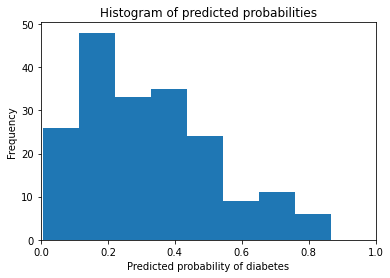

In [40]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

**Disminuir el umbral** de predicción de diabetes para **aumentar la sensibilidad** del clasificador

In [41]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

D:\UserFiles\anaconda\envs\ia\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [42]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [43]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [ ]:
# resultado previos (default threshold of 0.5)


In [44]:
print(confusion)

[[114  16]
 [ 46  16]]


In [ ]:
# nueva matriz de confusion(threshold of 0.3)


In [45]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [46]:
# sensitivity has increased (used to be 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [36]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


**Conclusión:**

- **El umbral de 0,5** se usa de forma predeterminada (para problemas binarios) para convertir las probabilidades pronosticadas en predicciones de clase
- El umbral se puede **ajustar** para aumentar la sensibilidad o la especificidad
- La sensibilidad y la especificidad tienen una **relación inversa**

## Curvas ROC y Área bajo la curva (AUC)

**Pregunta:** ¿No sería bueno si pudiéramos ver cómo la sensibilidad y la especificidad se ven afectadas por varios umbrales, sin cambiar realmente el umbral?

**Respuesta:** ¡Traza la curva ROC!

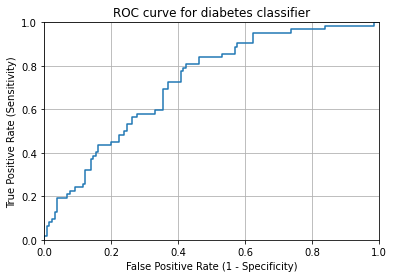

In [47]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- La curva ROC puede ayudarlo a **elegir un umbral** que equilibre la sensibilidad y la especificidad de una manera que tenga sentido para su contexto particular
- En realidad, no puede **ver los umbrales** utilizados para generar la curva en la propia curva ROC

In [48]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [49]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [50]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


AUC es el **porcentaje** del gráfico ROC que está **debajo de la curva**:

In [51]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


- AUC es útil como **resumen de un solo número** del rendimiento del clasificador.
- Si elige aleatoriamente una observación positiva y una negativa, AUC representa la probabilidad de que su clasificador asigne una **probabilidad predicha más alta** a la observación positiva.
- AUC es útil incluso cuando hay un **desequilibrio de clase alto** (a diferencia de la precisión de la clasificación).

In [52]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225